In [638]:
from sklearn.externals import joblib
import pandas as pd
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

df = pd.read_csv('C:\AI\\wine-reviews\winemag-data-130k-v2.csv', na_values="?")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


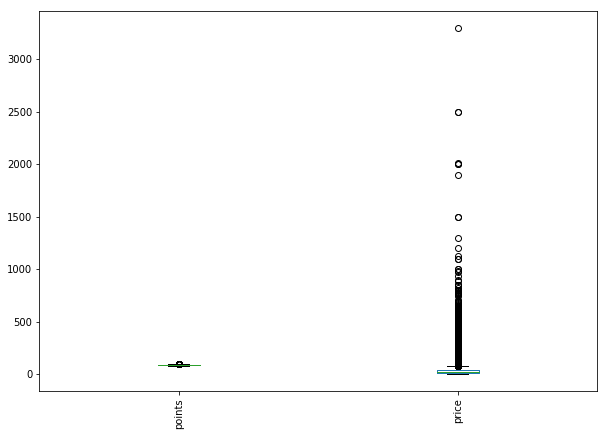

In [639]:
data.boxplot(rot=90, figsize=(10,7), grid=False)

In [640]:
## remove outliear
df = df.where(df['price'] < 1500)

## I drop these columns because some of them looks unrelated to final results(Unnamed: 0, taster_twitter_handle,designation), the others have 
## too many values(more than 1000 or 10000) so it is impossible to show them to users. What's more. I also tried to involve these values into
## my model and found they have very slight affect to my model's performance. So I just drop them
df = df.drop(['Unnamed: 0','taster_twitter_handle','title','region_2','description','designation','region_1','variety','winery'],1)
df = df.dropna()
df.head()

,country,points,price,province,taster_name
1,Portugal,87.0,15.0,Douro,Roger Voss
2,US,87.0,14.0,Oregon,Paul Gregutt
3,US,87.0,13.0,Michigan,Alexander Peartree
4,US,87.0,65.0,Oregon,Paul Gregutt
5,Spain,87.0,15.0,Northern Spain,Michael Schachner


In [641]:
# use the LabelEncoder function to convert the country to corresponding integers.
le_country = LabelEncoder()
le_country.fit(df['country'])
df['country']= le_country.transform(df['country'])
# le_country_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
# print(le_country_mapping)
df.head()

,country,points,price,province,taster_name
1,30,87.0,15.0,Douro,Roger Voss
2,39,87.0,14.0,Oregon,Paul Gregutt
3,39,87.0,13.0,Michigan,Alexander Peartree
4,39,87.0,65.0,Oregon,Paul Gregutt
5,36,87.0,15.0,Northern Spain,Michael Schachner


In [642]:
# use the LabelEncoder function to convert the province to corresponding integers.
le_province = LabelEncoder()
le_province.fit(df['province'])
df['province']= le_province.transform(df['province'])
# le_province_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
# print(le_name_mapping)
df.head()

,country,points,price,province,taster_name
1,30,87.0,15.0,105,Roger Voss
2,39,87.0,14.0,263,Paul Gregutt
3,39,87.0,13.0,213,Alexander Peartree
4,39,87.0,65.0,263,Paul Gregutt
5,36,87.0,15.0,257,Michael Schachner


In [643]:
# use the LabelEncoder function to convert the taster_name to corresponding integers.
le_taster_name = LabelEncoder()
le_taster_name.fit(df['taster_name'])
df['taster_name']= le_taster_name.transform(df['taster_name'])
# le_province_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
# print(le_name_mapping)
df.head()

,country,points,price,province,taster_name
1,30,87.0,15.0,105,15
2,39,87.0,14.0,263,14
3,39,87.0,13.0,213,0
4,39,87.0,65.0,263,14
5,36,87.0,15.0,257,12


### 1. Predict price with regression

In [644]:
X = df.drop(["price"], axis=1)
# Extract the target feature
y = df['price']
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [645]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(X_train, y_train)
print ("R^2 for linear regression is")
regr_linear.score(X_test,y_test)

R^2 for linear regression is


0.20709502389867251

using polynomial regression

In [646]:
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_reg_2.fit_transform(X_train)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly_2, y_train)
print ("R^2 for polynomial regression(degree = 2) is")
lin_reg_2.score(poly_reg_2.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 2) is


0.3113010603222708

In [647]:
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_3 = poly_reg_3.fit_transform(X_train)
lin_reg_3 = linear_model.LinearRegression()
lin_reg_3.fit(X_poly_3, y_train)
print ("R^2 for polynomial regression(degree = 3) is")
lin_reg_3.score(poly_reg_3.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 3) is


0.3673725401874456

In [648]:
poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly_4 = poly_reg_4.fit_transform(X_train)
lin_reg_4 = linear_model.LinearRegression()
lin_reg_4.fit(X_poly_4, y_train)
print ("R^2 for polynomial regression(degree = 4) is")
lin_reg_4.score(poly_reg_4.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 4) is


0.3934342388933691

In [649]:
poly_reg_5 = PolynomialFeatures(degree = 5)
X_poly_5 = poly_reg_5.fit_transform(X_train)
lin_reg_5 = linear_model.LinearRegression()
lin_reg_5.fit(X_poly_5, y_train)
print ("R^2 for polynomial regression(degree = 5) is")
lin_reg_5.score(poly_reg_5.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 5) is


0.40455817121764803

In [650]:
poly_reg_6 = PolynomialFeatures(degree = 6)
X_poly_6 = poly_reg_6.fit_transform(X_train)
lin_reg_6 = linear_model.LinearRegression()
lin_reg_6.fit(X_poly_6, y_train)
print ("R^2 for polynomial regression(degree = 6) is")
lin_reg_6.score(poly_reg_6.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 6) is


0.4094690828475262

In [651]:
poly_reg_7 = PolynomialFeatures(degree = 7)
X_poly_7 = poly_reg_7.fit_transform(X_train)
lin_reg_7 = linear_model.LinearRegression()
lin_reg_7.fit(X_poly_7, y_train)
print ("R^2 for polynomial regression(degree = 7) is")
lin_reg_7.score(poly_reg_7.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 7) is


0.3423178330551978

As we can see, degree = 6 has largest R^2. So we can conclude that performance becomes better when degree becomes larger.But when degree is too large, overfitting appears and performance goes down

### 2. Predict points with classification

In [652]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


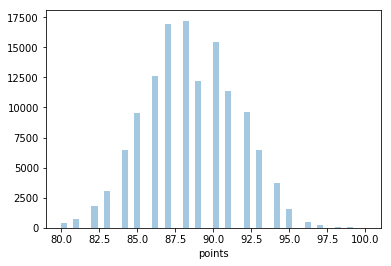

In [653]:
sns.distplot(data.points, kde=False)

In [654]:
def GoodRating(row):
    if row['points'] > 90:
        val = 1
    elif row['points'] > 85:
        val = 2
    else:
        val = 3
    return(val)
df['good'] = df.apply(GoodRating, axis=1)
df = df.drop(['points'],1)
df.head()

,country,price,province,taster_name,good
1,30,15.0,105,15,2
2,39,14.0,263,14,2
3,39,13.0,213,0,2
4,39,65.0,263,14,2
5,36,15.0,257,12,2


In [655]:
X1 = df.drop(["good"], axis=1)
# Extract the target feature
y1 = df['good']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [656]:
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train1, y_train1)
y_pred_DecisionTreeClassifier= clf_dtc.predict(X_test1)
print_score(y_test1,y_pred_DecisionTreeClassifier)

Accuracy:  66.93403402019085
Precision:  66.05522947590774
Recall:  66.93403402019085
f1 Score:  65.33143844730465


In [657]:
clf4 = GaussianNB()
clf4.fit(X_train1, y_train1)
y_pred_GaussianNB = clf4.predict(X_test1)
print_score(y_test1,y_pred_GaussianNB)

Accuracy:  62.72299820218503
Precision:  63.26178238038509
Recall:  62.72299820218503
f1 Score:  55.71992335348281


In [658]:
clf5 = RandomForestClassifier()
clf5.fit(X_train1, y_train1)
y_pred_rabdom_for_test = clf5.predict(X_test1)
print_score(y_test1,y_pred_rabdom_for_test)

Accuracy:  67.15530355414188
Precision:  66.26542062390732
Recall:  67.15530355414188
f1 Score:  65.52055481308646


In [659]:
knn_3 = KNeighborsClassifier(3, weights='uniform', p=2, metric='euclidean')
knn_3.fit(X_train1, y_train1)
y_pred_KNeighborsClassifier_3 = knn_3.predict(X_test1)
print_score(y_test1,y_pred_KNeighborsClassifier_3)

Accuracy:  62.23551376019915
Precision:  61.15354589631379
Recall:  62.23551376019915
f1 Score:  61.27634833778154


In [660]:
knn_4 = KNeighborsClassifier(4, weights='uniform', p=2, metric='euclidean')
knn_4.fit(X_train1, y_train1)
y_pred_KNeighborsClassifier_4 = knn_4.predict(X_test1)
print_score(y_test1,y_pred_KNeighborsClassifier_4)

Accuracy:  63.047987830175636
Precision:  62.12178991210382
Recall:  63.047987830175636
f1 Score:  61.41621915923554


In [661]:
knn_2 = KNeighborsClassifier(2, weights='uniform', p=2, metric='euclidean')
knn_2.fit(X_train1, y_train1)
y_pred_KNeighborsClassifier_2 = knn_2.predict(X_test1)
print_score(y_test1,y_pred_KNeighborsClassifier_2)

Accuracy:  59.13428294841654
Precision:  59.376684469575345
Recall:  59.13428294841654
f1 Score:  57.52608177704134


In [662]:
knn_1 = KNeighborsClassifier(1, weights='uniform', p=2, metric='euclidean')
knn_1.fit(X_train1, y_train1)
y_pred_KNeighborsClassifier_1 = knn_1.predict(X_test1)
print_score(y_test1,y_pred_KNeighborsClassifier_1)

Accuracy:  58.003733923385425
Precision:  57.89021138985071
Recall:  58.003733923385425
f1 Score:  57.92700675999384


Random forest classifier has the best performance. Random forest classifier contains a lot of decision tree, which make it a better choice to 
avoid overfitting. It also has advantages in multiple features dataset.

In [666]:
def print_score(y_true,y_pred):
    accuracy_dt =  accuracy_score(y_true,y_pred)*100
    print('Accuracy: ', accuracy_dt)
    precision_dt = precision_score(y_true,y_pred,average='weighted')*100
    print('Precision: ', precision_dt)
    recall_dt = recall_score(y_true,y_pred,average='weighted')*100
    print('Recall: ', recall_dt)
    f1_dt = f1_score(y_true,y_pred,average='weighted')*100
    print('f1 Score: ', f1_dt)